In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("data_finish.csv")

In [3]:
features = ['RR', 'RH_avg', 'ff_avg']
target = 'flood'

In [4]:
df_clean = df[features + [target]].copy()
df_clean = df_clean.fillna(0) # Assume NaN rain is 0


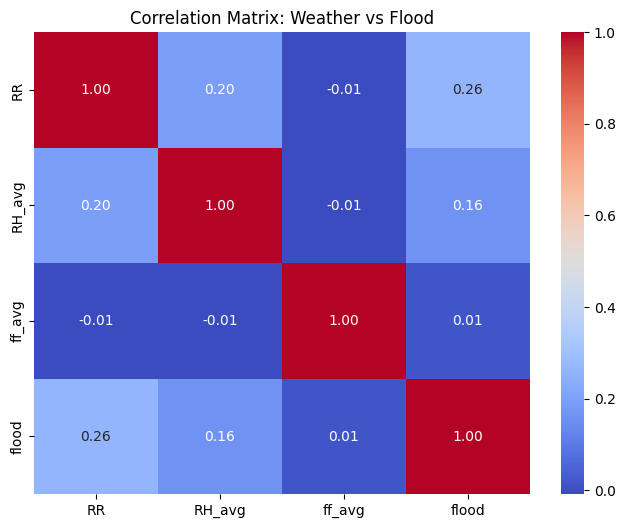

In [5]:
# EDA (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Weather vs Flood")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21716\662417833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df_clean, palette="Set2", showfliers=False) # <--- INI KUNCINYA
C:\Users\User\AppData\Local\Temp\ipykernel_21716\662417833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df_clean, palette="Set2", showfliers=False) # <--- INI KUNCINYA
C:\Users\User\AppData\Local\Temp\ipykernel_21716\662417833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df_clean, palette="S

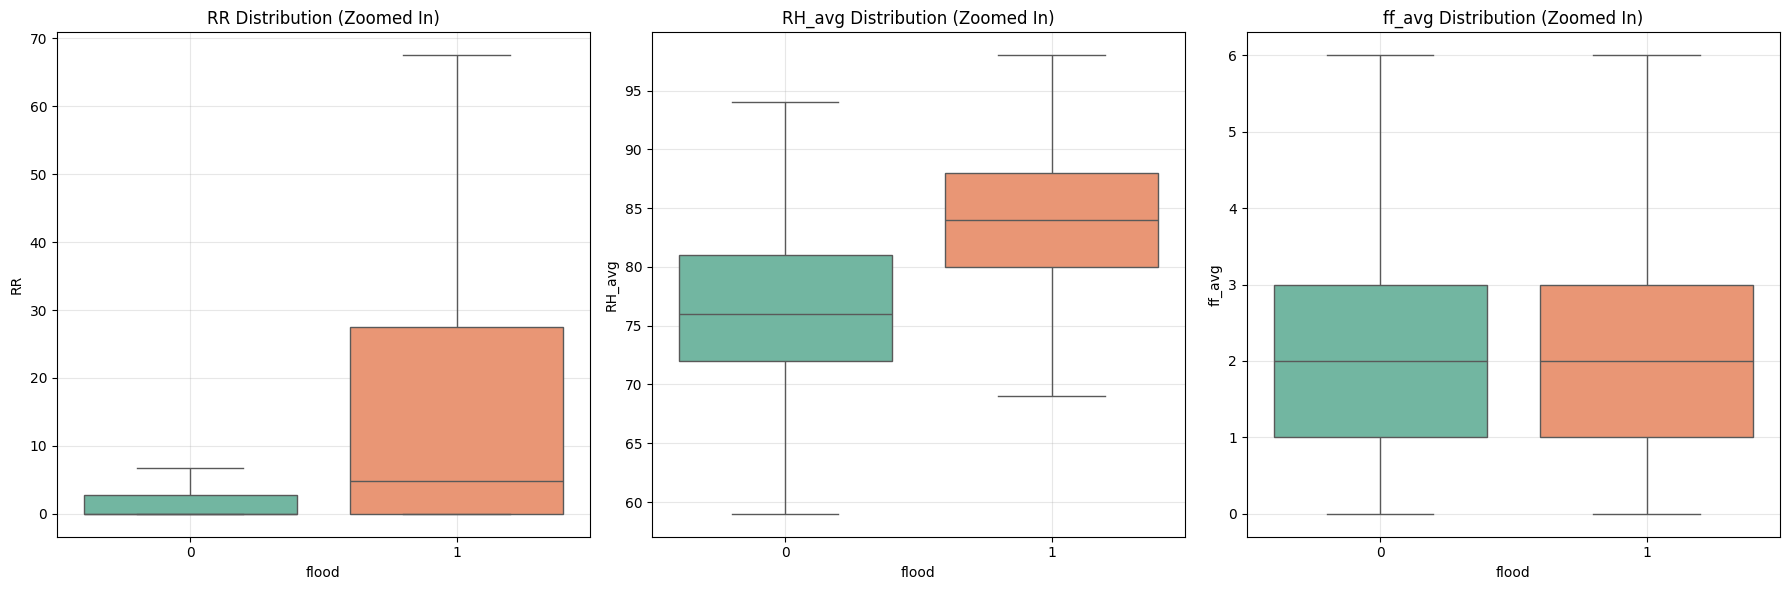

In [6]:
plt.figure(figsize=(18, 6)) # Saya perbesar sedikit ukurannya
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=target, y=col, data=df_clean, palette="Set2", showfliers=False) # <--- INI KUNCINYA
    plt.title(f"{col} Distribution (Zoomed In)")
    plt.grid(True, alpha=0.3) # Tambah garis bantu biar enak dilihat

plt.tight_layout()
plt.show()

In [7]:
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We use a robust Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
# 📝 CLASSIFICATION REPORT
# ==========================================
y_pred = model.predict(X_test)

print(f"✅ Model Trained. Accuracy: {model.score(X_test, y_test):.2f}")
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

✅ Model Trained. Accuracy: 0.91

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1154
           1       0.29      0.04      0.07       108

    accuracy                           0.91      1262
   macro avg       0.60      0.51      0.51      1262
weighted avg       0.86      0.91      0.88      1262



In [9]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("🎉 'model.pkl' saved! Move this file to the same folder as app.py")

🎉 'model.pkl' saved! Move this file to the same folder as app.py
